<a href="https://colab.research.google.com/github/Yango4you/FP_TUM/blob/main/TripletSemiHardLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import io
import numpy as np
import tensorflow as tf

!pip install tensorflow_addons
import tensorflow_addons as tfa
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [5]:
def _normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)

train_dataset, test_dataset = tfds.load(name="cifar10", split=['train', 'test'], as_supervised=True)

# Build your input pipelines
train_dataset = train_dataset.shuffle(1024).batch(32)
train_dataset = train_dataset.map(_normalize_img)

test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.map(_normalize_img)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteLYSQ4Z/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteLYSQ4Z/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=None), # No activation on final dense layer
    tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1)) # L2 normalize embeddings
])

In [16]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss(),
    metrics=['accuracy'])

history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=(test_dataset))

Epoch 1/5
1563/1563 [==============================] - 101s 64ms/step - loss: 0.9029 - accuracy: 0.0023
Epoch 2/5
1563/1563 [==============================] - 120s 76ms/step - loss: 0.9005 - accuracy: 0.0021
Epoch 3/5
1563/1563 [==============================] - 124s 79ms/step - loss: 0.8981 - accuracy: 0.0019
Epoch 4/5
1563/1563 [==============================] - 104s 66ms/step - loss: 0.8963 - accuracy: 0.0018
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8933 - accuracy: 0.0017


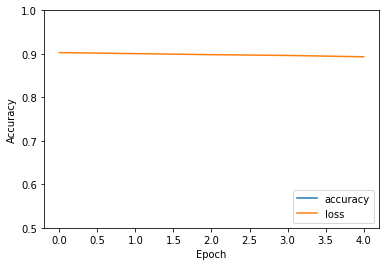

313/313 - 5s - loss: 0.8861 - accuracy: 0.0011 - 5s/epoch - 16ms/step
0.0010999999940395355


In [17]:
results = model.predict(test_dataset)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(test_acc)

SyntaxError: ignored